In [221]:
# for clustering
from skfuzzy.cluster import cmeans, cmeans_predict
'''cntr, u, u0, d, jm, p, fpc = cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)'''

# for data handling
import xarray as xr
import pandas as pd
import numpy as np

# for scikit-learn compatibility
from sklearn.base import BaseEstimator

class CmeansModel(BaseEstimator):
    """docstring for CmeansModel"""

    def __init__(self, c=5, m=2, err=1e-3, maxiter=100):
        super(CmeansModel, self).__init__()
        self.c = c
        self.m = m
        self.err = err
        self.maxiter = maxiter
        
    def get_params(self, deep=False):
        # required for scikit-learn interoperability
        return {'c':self.c,'m':self.m,'err':self.err,'maxiter':self.maxiter}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, y=None):
        cntr, u, u0, d, jm, p, fpc = cmeans(
            X, self.c, self.m, error=self.err, maxiter=self.maxiter, init=None
        )

        self.model = {
            'cntr':cntr,
            'u':u,
            'u0':u0,
            'd':d,
            'jm':jm,
            'p':p,
            'fpc':fpc
        }
        return None
   
    def transform(self, X):
        return cmeans_predict(X, cntr_trained=self.model['cntr'], m=self.m, error=self.err, maxiter=self.maxiter)[0]
    
        
    def score(self):
        return self.model['fpc']

## generate test cluster data

In [222]:
from sklearn.datasets import make_blobs
import pandas as pd

In [223]:
blobs, labels = make_blobs(n_samples=2000, n_features=2)

In [224]:
df = pd.DataFrame(blobs)

<AxesSubplot:xlabel='0', ylabel='1'>

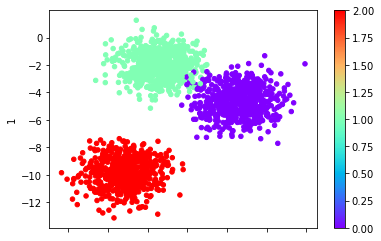

In [225]:
df.plot.scatter(x=0,y=1,c=labels, cmap='rainbow')

# Try out WaterClassifer!

In [226]:
import matplotlib.pyplot as plt

In [227]:
# test = WaterClassifier(model='cmeans', m=2, c=3, err=1e-2, maxiter=100)
test = CmeansModel()

In [228]:
test.fit(blobs.T)

In [229]:
test.transform(blobs.T).shape

(5, 2000)

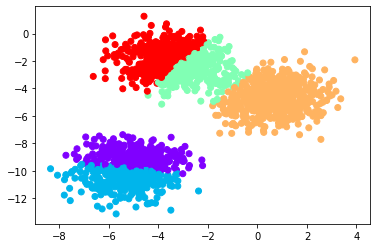

In [230]:
plt.figure()
plt.scatter(*test.model['cntr'].T, marker='x')

plt.scatter(*blobs.T, c=np.argmax(test.transform(blobs.T), axis=0), cmap='rainbow')

## gridsearch 

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
param_grid = {'m':[1.5,2.0,2.5],'c':[2,3,4,5,6,7,8,9,10],'err':[1e-2],'maxiter':[100]}

In [240]:
gs = GridSearchCV(estimator=CmeansModel(),
             param_grid=param_grid)

In [235]:
from sklearn.utils.estimator_checks import check_estimator


In [242]:
gs.fit(blobs)

TypeError: score() takes 1 positional argument but 2 were given